In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv('C:\weights_heights.csv', index_col='Index')

Гистограмма распределения роста.

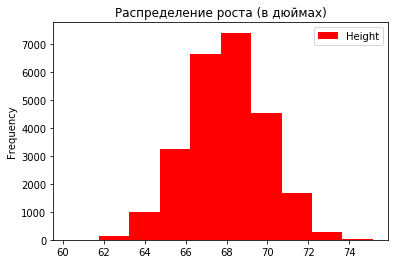

In [4]:
data.plot(y='Height', kind='hist', color='red',  title='Распределение роста (в дюймах)')

Вывод 5 первых записей и гистограмма распределения веса.

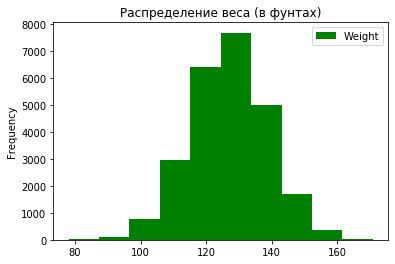

In [5]:
data.head(5)
data.plot(y='Weight', kind='hist', color='green',  title='Распределение веса (в фунтах)')

Добавление индекса массы тела (BMI) в датафрейм.

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2


data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Графики попарных зависимостей признаков.

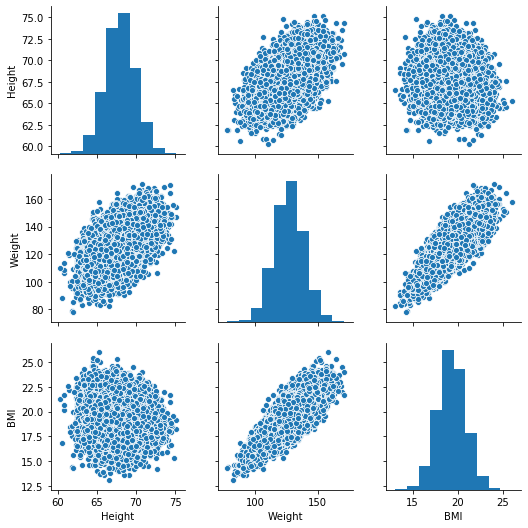

In [7]:
sns.pairplot(data)

Добавление признака weight_category, построение boxplot'а для зависимости роста от весовой категории. 

[Text(0, 0.5, 'Рост'), Text(0.5, 0, 'Весовая категория')]

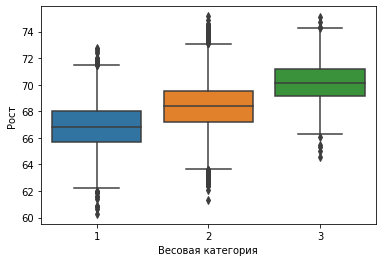

In [8]:
def weight_category(weight):
    if(weight<120):
        wc=1
    elif(weight>=150):
        wc=3
    else:
        wc=2
    return wc

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x=data['weight_cat'], y=data['Height']).set(xlabel='Весовая категория', ylabel='Рост')

scatter plot зависимости роста от веса 

Text(0.5, 1.0, 'Зависимость роста от веса')

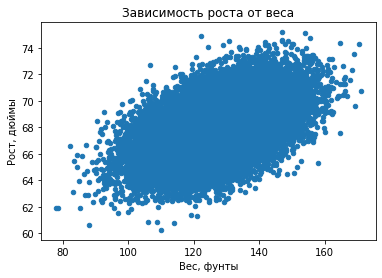

In [9]:
a=data.plot(x="Weight", y="Height", kind='scatter')
a.set_ylabel(u"Рост, дюймы")
a.set_xlabel(u"Вес, фунты")
a.set_title(u"Зависимость роста от веса")

Функция, вычисляющая по двум параметрам $w_0$ и $w_1$ квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [14]:
def error(w0,w1):
    return sum((data['Height'] - (w0 + w1*data['Weight'])) ** 2)

На графике зависимости роста от веса провести две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$.

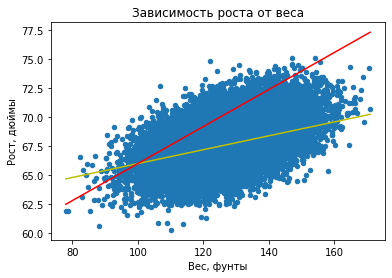

In [15]:
def make_plot():
    a=data.plot(x="Weight", y="Height", kind='scatter')
    a.set_ylabel(u"Рост, дюймы")
    a.set_xlabel(u"Вес, фунты")
    a.set_title(u"Зависимость роста от веса")
    return a

def make_line(w0, w1, c):
    x = np.linspace(min(data['Weight']), max(data['Weight']), 500)
    plt.plot(x, w0 + w1 * x, c)
    
    
    
make_plot()
make_line(60,0.06,'y')
make_line(50,0.16,'r')
    


График зависимости функции ошибки от параметра $w_1$ при $w_0$ = 50. 

Text(0.5, 1.0, 'Зависимость ошибки от w1 при w0 = 50')

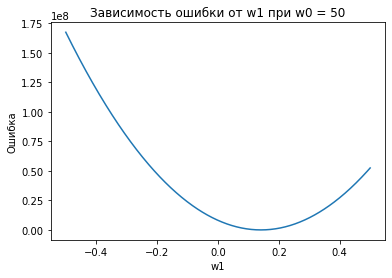

In [17]:
x = np.linspace(-0.5, 0.5, 500)
y = [error(50, w1) for w1 in x]
plt.plot(x, y)
plt.xlabel("w1")
plt.ylabel("Ошибка")
plt.title("Зависимость ошибки от w1 при w0 = 50")

Минимум функции error для значений параметра  $w_1$ в диапазоне [-5,5].

In [23]:
from scipy.optimize import minimize_scalar

def error50(w1):
    return error(50,w1)

w1_min = minimize_scalar(error50, bounds=(-5, 5), method='bounded').x
print('Минимум: ',w1_min)

Минимум:  0.1410920372883444


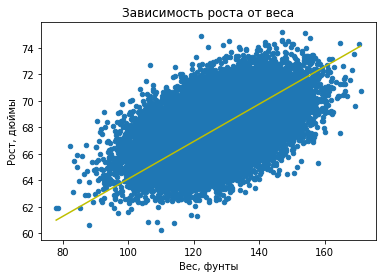

In [25]:
make_plot()
make_line(50,w1_min,'y')

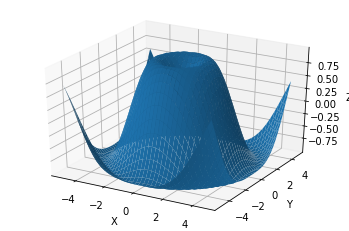

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



3D-график зависимости функции ошибки от параметров $w_0$ и $w_1$. 

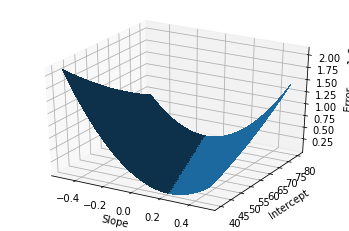

In [28]:
w0 = np.linspace(40, 80, 100)
w1 = np.linspace(-0.5, 0.5, 100)
xs, ys = np.meshgrid(w1, w0)
zs = np.zeros((len(w0), len(w1)))
for i in range(len(w0)):
    for j in range(len(w1)):
        zs[i, j] = error(w0[i], w1[j])
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, linewidth=0, antialiased=False)
ax.set_ylabel('Intercept')
ax.set_xlabel('Slope')
ax.set_zlabel('Error')
plt.show()

Минимум функции для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0).

In [31]:
from scipy.optimize import minimize
def errorv(v):
    return error(v[0],v[1])
w_min = minimize(errorv, [0,0], method='L-BFGS-B', bounds=[(-100,100),(-5,5)]).x
print('Минимумы: ', w_min)

Минимумы:  [57.57171323  0.08200701]


График с оптимальными значениями $w_0$ и $w_1$

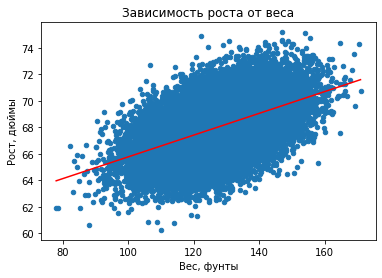

In [32]:
make_plot()
make_line(w_min[0],w_min[1],'r')